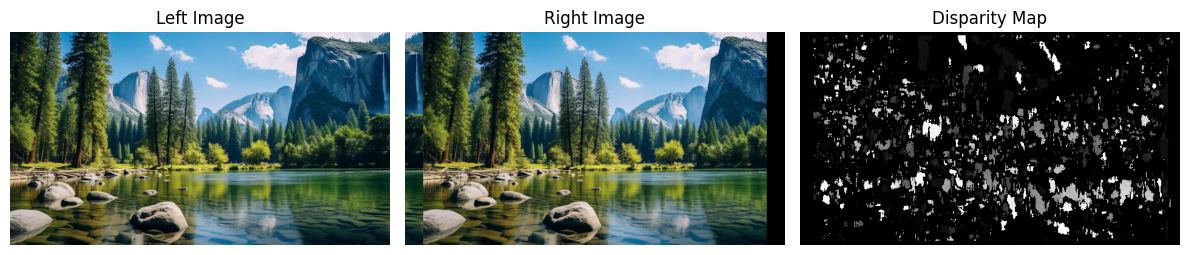

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a base image (simulating a 3D scene)
base_image = cv2.imread('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/image.jpg')

# Step 2: Define the horizontal shift to simulate stereo images
shift_value = 30  # Shift amount in pixels

# Step 3: Create the left and right images by shifting the base image
left_image = base_image.copy()  # Left image remains the same
right_image = np.roll(base_image, shift_value, axis=1)  # Shift right image to the left

# Optional: Fill the right side of the right image with black
right_image[:, -shift_value:] = 0

# Step 4: Save the left and right images
cv2.imwrite('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/left_image.jpeg', left_image)
cv2.imwrite('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/right_image.jpeg', right_image)

# Step 5: Load left and right images in grayscale
left_img = cv2.imread('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/left_image.jpeg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/right_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 6: Initialize StereoBM object
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

# Step 7: Compute disparity map
disparity = stereo.compute(left_img, right_img)

# Step 8: Normalize disparity for better visualization
disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# Step 9: Display left, right, and disparity map using Matplotlib
plt.figure(figsize=(12, 6))

# Display left image
plt.subplot(1, 3, 1)
plt.title('Left Image')
plt.imshow(cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.axis('off')

# Display right image
plt.subplot(1, 3, 2)
plt.title('Right Image')
plt.imshow(cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.axis('off')

# Display disparity map
plt.subplot(1, 3, 3)
plt.title('Disparity Map')
plt.imshow(disparity_normalized, cmap='gray')
plt.axis('off')

# Show all images
plt.tight_layout()
plt.show()